In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl
import seaborn as sns

In [51]:
# Load dataset

dataset = pd.read_csv('C:\\Users\\HP\\Downloads\\Salaries.csv')
dataset.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [6]:
columnsNames = dataset.columns
for name in columnsNames:
    print(name)

Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [27]:
#a method to print each column's name, type and null values count

datatypes = dataset.dtypes
nulItems = dataset.isnull().sum()
for columnName, count in nulItems.items():
    datatype = datatypes[columnName]
    print(f" {columnName} , {datatype} : {count} null values.")

 Id , int64 : 0 null values.
 EmployeeName , object : 0 null values.
 JobTitle , object : 0 null values.
 BasePay , float64 : 609 null values.
 OvertimePay , float64 : 4 null values.
 OtherPay , float64 : 4 null values.
 Benefits , float64 : 36163 null values.
 TotalPay , float64 : 0 null values.
 TotalPayBenefits , float64 : 0 null values.
 Year , int64 : 0 null values.
 Notes , float64 : 148654 null values.
 Agency , object : 0 null values.
 Status , float64 : 148654 null values.


In [28]:
#using describe method to find basic statistics

dataset.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [24]:
#finding the range of salaries

minimum = dataset['TotalPay'].min()
maximum = dataset['TotalPay'].max()

print(f"The range of salaries is from {minimum} to {maximum}.")

The range of salaries is from -618.13 to 567595.43.


In [48]:
dataset2 = dataset.drop("Status", axis=1) #drop the whole attribute, all values are null
dataset2 = dataset2.drop("Notes", axis=1) #drop the whole attribute, all values are null
dataset2 = dataset2.dropna(subset=['BasePay']) #drop only the null values, emplyees with no base pay
dataset2['OvertimePay'].fillna(0, inplace=True) #replace null OvertimePay with 0
dataset2['Benefits'].fillna(0, inplace=True) #replace null Benefits values with 0

In [50]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148045 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148045 non-null  int64  
 1   EmployeeName      148045 non-null  object 
 2   JobTitle          148045 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148045 non-null  float64
 5   OtherPay          148045 non-null  float64
 6   Benefits          148045 non-null  float64
 7   TotalPay          148045 non-null  float64
 8   TotalPayBenefits  148045 non-null  float64
 9   Year              148045 non-null  int64  
 10  Agency            148045 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


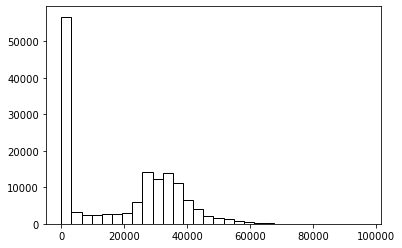

In [73]:
#a histogram that shows the distribution of benefits
plt.hist(dataset2['Benefits'], bins=30,color = 'white', edgecolor='black')
plt.show()

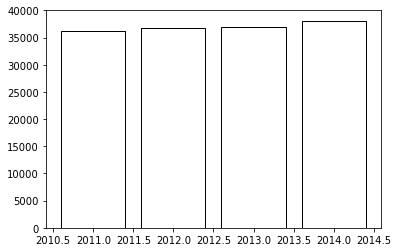

In [69]:
#a bar chart to show number of empolyees each year (count)
count = dataset2['Year'].value_counts().sort_index()
plt.bar(count.index, count.values, color = 'white' , edgecolor='black')
plt.show()

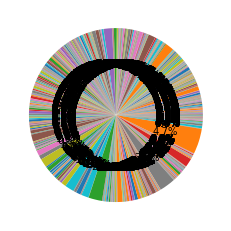

In [77]:
count = dataset2['JobTitle'].value_counts().sort_index() #since there is no deparrment column i used the JobTitle
plt.pie(count.values, autopct='%1.1f%%')
plt.show()

In [88]:
#group data by year to compare the base pay in each and empolyee count
grouped_data = dataset2.groupby('Year').agg({'BasePay': 'mean', 'Id': 'count'})
print(grouped_data)

           BasePay     Id
Year                     
2011  63595.956517  36159
2012  65436.406857  36766
2013  69630.030216  37001
2014  66564.421924  38119


In [89]:
grouped_data.describe()

,BasePay,Id
count,4.000000,4.000000
mean,66306.703879,37011.250000
std,2530.907920,819.286834
min,63595.956517,36159.000000
25%,64976.294272,36614.250000
50%,66000.414391,36883.500000
75%,67330.823997,37280.500000
max,69630.030216,38119.000000


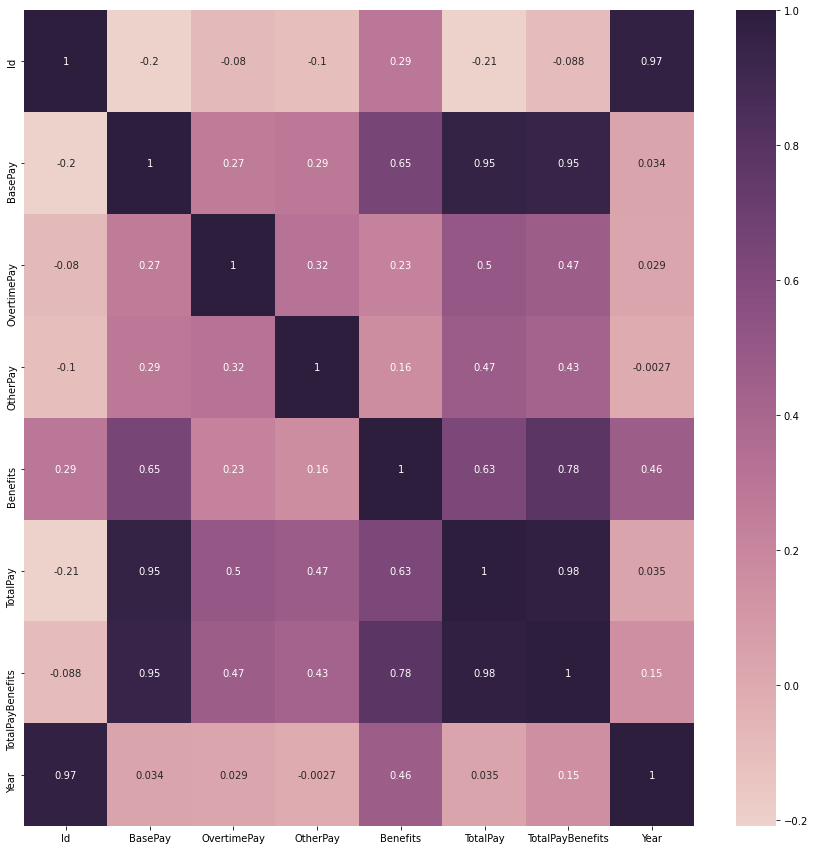

In [91]:
#using heatmap to identify important features that are dependent on each other
#the closer the number is to one, the more two features are correlated (dependent on each other)
corr_matrix = dataset2.corr()
feature_index = corr_matrix.index
plt.figure(figsize = (15,15))
sns.heatmap(dataset2[feature_index].corr(),annot =True, cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

In [94]:
#i chose BasePay and TotalPayBenefits since the correlation is quite high
#calculating the correlation directly to make sure
subset_dataset = dataset2[['BasePay', 'TotalPayBenefits']]
correlation = subset_dataset['BasePay'].corr(subset_dataset['TotalPayBenefits'])
print(correlation)

0.946595331541112


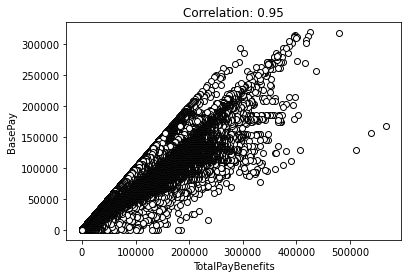

In [96]:
plt.scatter(subset_dataset['TotalPayBenefits'], subset_dataset['BasePay'], color = 'white' , edgecolor='black')
plt.xlabel('TotalPayBenefits')
plt.ylabel('BasePay')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()
#the scatter plot shows the strong direct correlation between the BasePay and the TotalPayBenefits, which is predictable condisdering the relatively high correlation element we got 